In [1]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os

Using TensorFlow backend.


In [2]:
# Getting labels of training data
labels = os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train')
labels

['rottenbanana',
 'freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenapples',
 'freshapples']

# Display images


 ROTTENBANANA


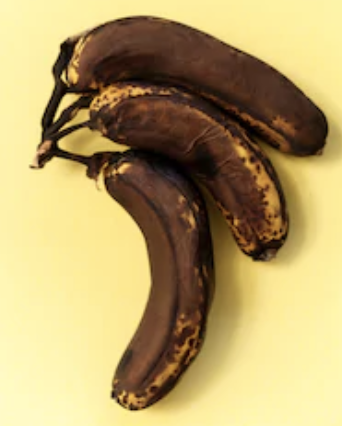

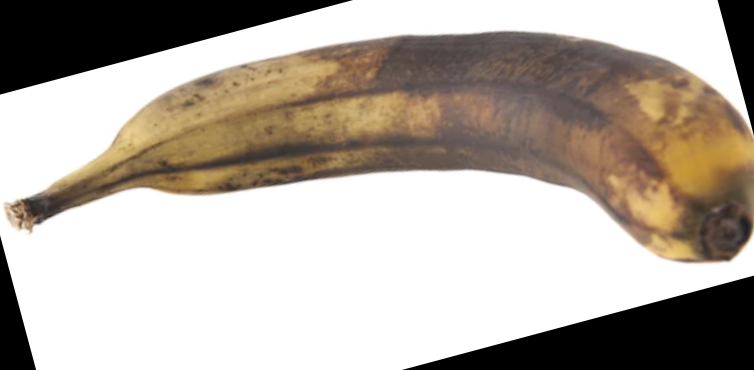

there are  2224  images in  rottenbanana class

 FRESHORANGES


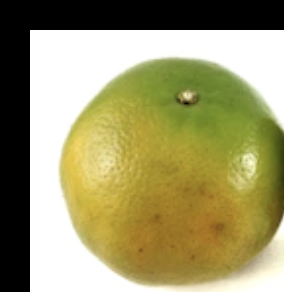

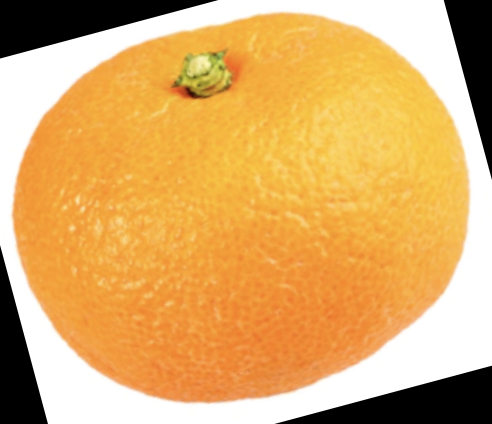

there are  1466  images in  freshoranges class

 ROTTENORANGES


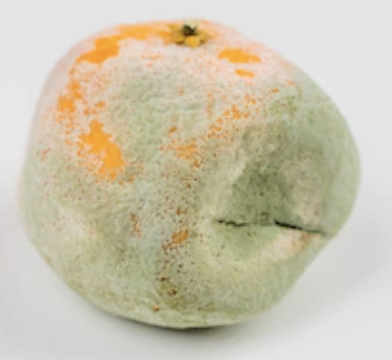

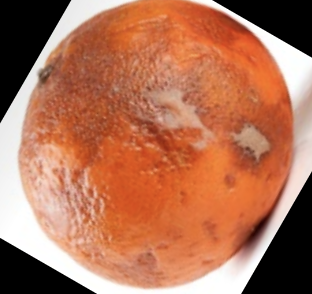

there are  1595  images in  rottenoranges class

 FRESHBANANA


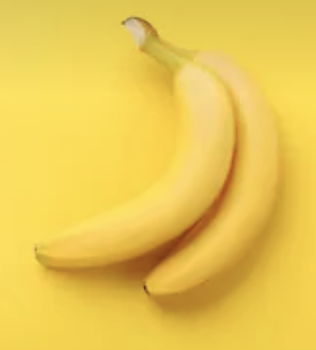

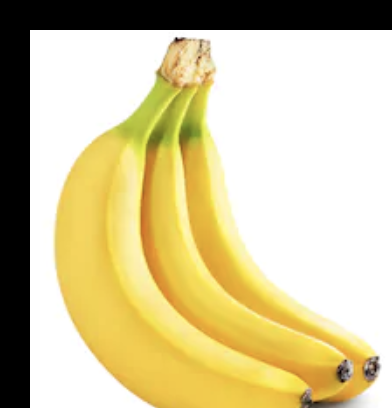

there are  1581  images in  freshbanana class

 ROTTENAPPLES


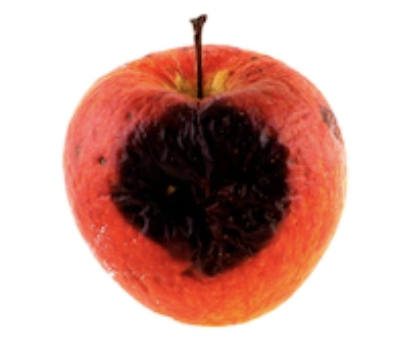

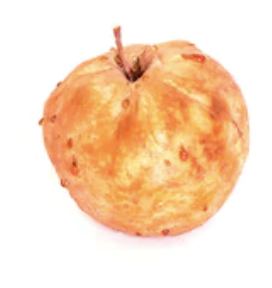

there are  2342  images in  rottenapples class

 FRESHAPPLES


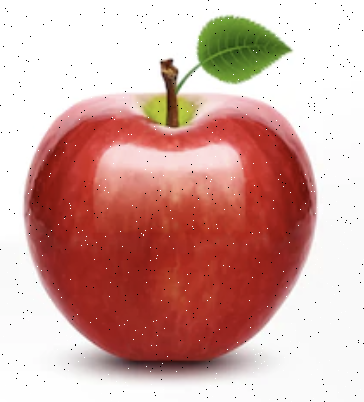

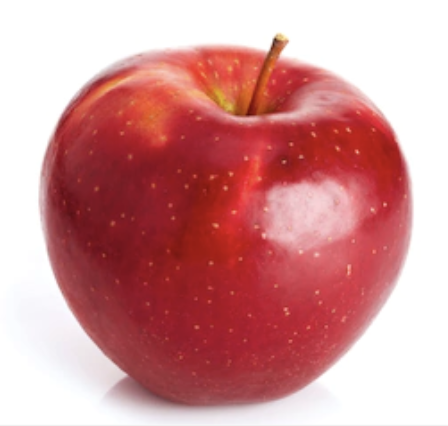

there are  1693  images in  freshapples class


In [3]:
from IPython.display import display, Image

num = []

for i in labels:
  path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train/{0}/'.format(i)
  folder_data = os.listdir(path)
  k=0
  print('\n', i.upper())
  for j in folder_data:
    if(k<2):
      display(Image(path+j))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', i, 'class')

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## 1. Chuẩn bị dữ liệu

### Thiết lập tham số

In [5]:
data_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'

img_width, img_height = 100, 100
batch_size = 32
epochs = 9


### Tăng cường dữ liệu và tạo tập dữ liệu

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,   # Chuẩn hóa pixel về khoảng [0, 1]
    shear_range=0.2,  # Biến dạng ảnh theo chiều ngang
    zoom_range=0.2,   # Phóng to / thu nhỏ ảnh ngẫu nhiên
    horizontal_flip=True, # Lật ảnh ngẫu nhiên theo chiều ngang
    validation_split=0.2  # Tách 20% dữ liệu làm tập validation
)


### Tạo generator cho dữ liệu huấn luyện và validation

In [7]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Chỉ lấy dữ liệu huấn luyện
)


Found 8723 images belonging to 6 classes.


In [8]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Chỉ lấy dữ liệu validation
)


Found 2178 images belonging to 6 classes.


In [9]:
num_classes = len(train_generator.class_indices)


## 2. Xây dựng mô hình CNN

## Giảm Learning Rate: từ 0.001 giảm xuống 0.0005.
## Thêm Dropout(0.3) giữa các lớp CNN để tăng khả năng khử overfitting.

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))  # Thêm Dropout để giảm overfitting

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))  # Thêm Dropout giữa các lớp CNN

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Giữ Dropout 0.5 trước lớp đầu ra
model.add(Dense(num_classes, activation='softmax'))

# 3. Huấn luyện mô hình với learning rate thấp hơn
model.compile(optimizer=Adam(learning_rate=0.0005),  # Giảm learning rate từ 0.001 xuống 0.0005
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Train for 272 steps, validate for 68 steps
Epoch 1/9
272/272 [==============================] - 113s 417ms/step - loss: 1.2088 - accuracy: 0.5204 - val_loss: 0.6741 - val_accuracy: 0.7854
Epoch 2/9
272/272 [==============================] - 75s 275ms/step - loss: 0.7001 - accuracy: 0.7454 - val_loss: 0.4590 - val_accuracy: 0.8594
Epoch 3/9
272/272 [==============================] - 74s 272ms/step - loss: 0.5388 - accuracy: 0.8108 - val_loss: 0.3627 - val_accuracy: 0.8801
Epoch 4/9
272/272 [==============================] - 75s 274ms/step - loss: 0.4809 - accuracy: 0.8319 - val_loss: 0.3244 - val_accuracy: 0.8860
Epoch 5/9
272/272 [==============================] - 73s 270ms/step - loss: 0.4128 - accuracy: 0.8559 - val_loss: 0.2698 - val_accuracy: 0.8994
Epoch 6/9
272/272 [==============================] - 74s 271ms/step - loss: 0.3762 - accuracy: 0.8689 - val_loss: 0.2695 - val_accuracy: 0.9058
Epoch 7/9
272/272 [==============================] - 73s 267ms/step - loss: 0.3485 - accurac

In [11]:
# test_data_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/'

test_generator = datagen.flow_from_directory(
    '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test',  
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Found 2698 images belonging to 6 classes.
85/85 [==============================] - 28s 335ms/step - loss: 0.1876 - accuracy: 0.9418
Test accuracy: 0.9418087601661682


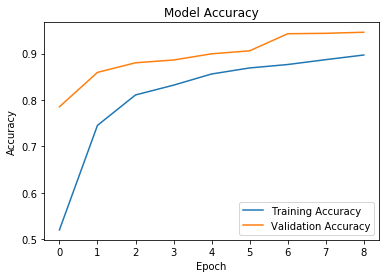

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


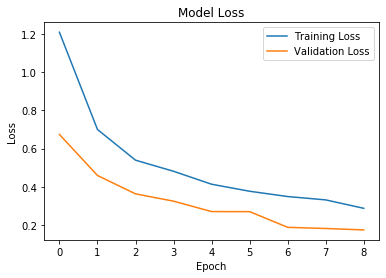

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


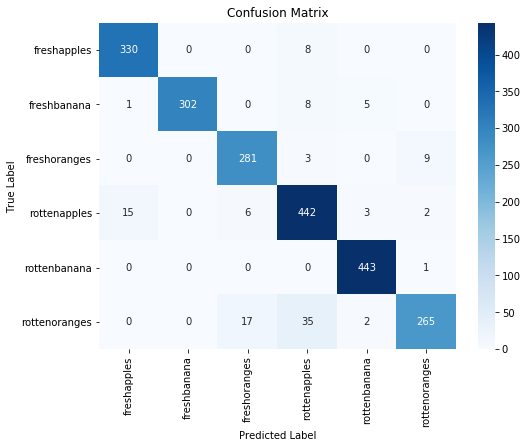

               precision    recall  f1-score   support

  freshapples       0.95      0.98      0.96       338
  freshbanana       1.00      0.96      0.98       316
 freshoranges       0.92      0.96      0.94       293
 rottenapples       0.89      0.94      0.92       468
 rottenbanana       0.98      1.00      0.99       444
rottenoranges       0.96      0.83      0.89       319

     accuracy                           0.95      2178
    macro avg       0.95      0.94      0.95      2178
 weighted avg       0.95      0.95      0.95      2178



In [14]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dự đoán trên tập validation
y_true = []
y_pred = []

# Lặp qua từng batch trong validation set
for batch in validation_generator:
    images, labels = batch
    predictions = model.predict(images)
    
    y_true.extend(np.argmax(labels, axis=1))  # Ground truth labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Dự đoán từ mô hình

    if len(y_true) >= validation_generator.samples:  # Dừng khi đủ mẫu
        break

# Chuyển về numpy array
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Tạo Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Lấy tên các class từ generator
class_labels = list(validation_generator.class_indices.keys())

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# In báo cáo chi tiết từng class
print(classification_report(y_true, y_pred, target_names=class_labels))


In [15]:
model.save("fruit_20epochs_lr=0.0005.h5")

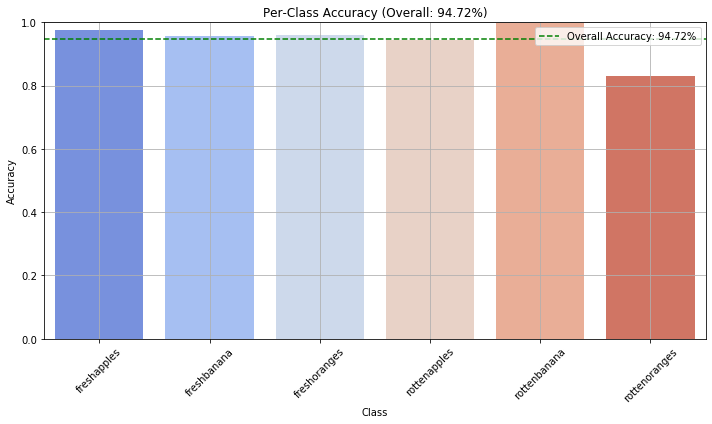

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns


# Get class names in correct index order
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_accuracies = cm.diagonal() / cm.sum(axis=1)

# Overall accuracy
overall_acc = accuracy_score(y_true, y_pred)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_accuracies, palette="coolwarm")
plt.axhline(overall_acc, color='green', linestyle='--', label=f'Overall Accuracy: {overall_acc:.2%}')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Class")
plt.title(f"Per-Class Accuracy (Overall: {overall_acc:.2%})")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()